In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("labels.csv")

In [3]:
dataset


,index,tweet,class
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...,...
24778,25291,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,25292,"you've gone and broke the wrong heart baby, an...",2
24780,25294,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,25295,youu got wild bitches tellin you lies,1


In [4]:
dataset.isnull().sum()

index    0
tweet    0
class    0
dtype: int64

In [5]:
#dataset["labels"] = dataset["class"].map(0:"Hate Speech", 1:"Offensive Language", 2:"Clean language")

In [6]:
#dataset["labels"] = dataset["class"].map(1:"Hate Speech", 2:"Clean Language")

In [7]:
dataset["labels"] = dataset["class"].map({0:"Hate Speech", 1:"Offensive Language", 2:"Clean language"})

In [8]:
dataset

,index,tweet,class,labels
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,2,Clean language
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,Offensive Language
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,Offensive Language
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,Offensive Language
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,Offensive Language
...,...,...,...,...
24778,25291,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,Offensive Language
24779,25292,"you've gone and broke the wrong heart baby, an...",2,Clean language
24780,25294,young buck wanna eat!!.. dat nigguh like I ain...,1,Offensive Language
24781,25295,youu got wild bitches tellin you lies,1,Offensive Language


In [9]:
#data = dataset(["tweet","labels"])

In [10]:
data = dataset[["tweet","labels"]]

In [11]:
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Clean language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Clean language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [12]:
import re
import nltk
#nltk.download('stopwords')


In [13]:
#removal of stop words and stemming the words

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

In [14]:
stemmer = nltk.SnowballStemmer("english")

In [15]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
stemmer

# DATA CLEANING

In [17]:
import string

In [18]:
#data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+\www.S+','',text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<.*?>','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    #stop words removal
    #text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join([word for word in text.split(' ') if word not in stop_words])
    #stemming the text
    #text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join([stemmer.stem(word) for word in text.split(' ')])
    return text

In [19]:
data['tweet']= data['tweet'].apply(clean_data) 

C:\Users\dbhar\AppData\Local\Temp\ipykernel_15356\3020873290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(clean_data)


In [20]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,Clean language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,Clean language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [21]:
x = np.array(data['tweet'])
y = np.array(data['labels'])

In [22]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [25]:
x

<24783x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 198287 stored elements in Compressed Sparse Row format>

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33,random_state =42)

In [27]:
X_train

<16604x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 132892 stored elements in Compressed Sparse Row format>

## BUILDING ML MODEL

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)

### Confusion Matrix and Accuracy

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [32]:
cm

array([[1082,   31,  266],
       [  33,  161,  271],
       [ 220,  240, 5875]], dtype=int64)

In [33]:
import seaborn as sns
import matplotlib.pyplot as ply

<Axes: >

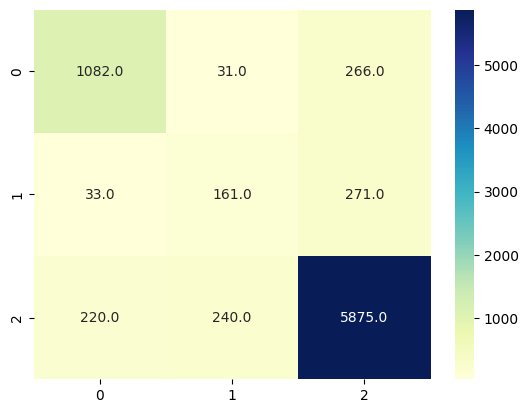

In [34]:
sns.heatmap(cm,cmap= "YlGnBu", annot = True, fmt=".1f")

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8702775400415699

In [36]:
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)

In [37]:
sample

'let unit kill peopl protest govern'

In [38]:
data1= cv.transform([sample]).toarray()

In [39]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)